# Organise data

In [1]:
import re
import numpy as np

mono_file = open('mono/300k/log.lammps')
tri_file = open('tri/300k/log.lammps')

mono_line = mono_file.readlines()
tri_line = tri_file.readlines()

mono_data = mono_line[176:6177] + mono_line[6235:16235]
tri_data = tri_line[176:6177] + tri_line[6235:16235]

time = []
time_scaled = []
time2 = []
time2_scaled = []

mono_sorted = []
tri_sorted = []

mono_energy = []
mono_energy_unit = []
tri_energy = []
tri_energy_unit = []


for dat in mono_data[:9950]:
    split = re.split(' +', dat)
    mono_sorted.append(float(split[2]))
    time.append(float(split[1]))
    
for dat in mono_data[9950:]:
    split = re.split(' +', dat)
    mono_sorted.append(float(split[1]))
    time.append(float(split[0]))
    
for dat in tri_data[:9950]:
    split = re.split(' +', dat)
    tri_sorted.append(float(split[2]))
    time2.append(float(split[1]))
    
for dat in tri_data[9950:]:
    split = re.split(' +', dat)
    tri_sorted.append(float(split[1]))
    time2.append(float(split[0]))

    
for t in time:
    time_scaled.append(t/1000000)
    
for t in time2:
    time2_scaled.append(t/1000000)

####################    
    
f_var_mono = 0
f_var_tri = 0

for dat in mono_sorted:
    diff = (dat - 300)**2
    f_var_mono = f_var_mono + diff
    
f_var_mono = np.sqrt(f_var_mono/len(mono_sorted))

print(f'mono - {f_var_mono}')    


for dat in tri_sorted:
    diff = (dat - 300)**2
    f_var_tri = f_var_tri + diff
    
f_var_tri = np.sqrt(f_var_tri/len(tri_sorted))
    
print(f'tri - {f_var_tri}')  
 
    
###################    

for dat in mono_data[:9950]:
    split = re.split(' +', dat)
    mono_energy.append(float(split[5]))
    
for dat in mono_data[9950:]:
    split = re.split(' +', dat)
    mono_energy.append(float(split[4]))
    
for dat in mono_energy:
    mono_energy_unit.append(dat/39366)
    
for dat in tri_data[:9950]:
    split = re.split(' +', dat)
    tri_energy.append(float(split[5]))
    
for dat in tri_data[9950:]:
    split = re.split(' +', dat)
    tri_energy.append(float(split[4]))
    
for dat in tri_energy:
    tri_energy_unit.append(dat/39366)

mono - 1.2341879097304433
tri - 1.2424191275445207


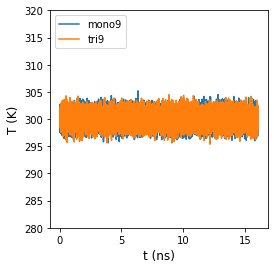

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

plt.plot(time_scaled, mono_sorted)
plt.plot(time2_scaled, tri_sorted)
plt.ylim(280, 320)
plt.legend(['mono9', 'tri9'], loc='upper left')

plt.ylabel('T (K)', size=12)
plt.xlabel('t (ns)', size=12)

def make_square_axes(ax):
    """Make an axes square in screen units.

    Should be called after plotting.
    """
    ax.set_aspect(1 / ax.get_data_ratio())
    
make_square_axes(plt.gca())

plt.savefig('temp_9_300.jpg', bbox_inches='tight', dpi=500)

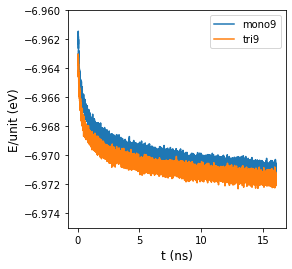

In [3]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(time_scaled, mono_energy_unit)
plt.plot(time2_scaled, tri_energy_unit)
plt.legend(['mono9', 'tri9'], loc='upper right')
plt.ylim(-6.975, -6.96)

plt.ylabel('E/unit (eV)', size=12)
plt.xlabel('t (ns)', size=12)

def make_square_axes(ax):
    """Make an axes square in screen units.

    Should be called after plotting.
    """
    ax.set_aspect(1 / ax.get_data_ratio())
    
make_square_axes(plt.gca())

plt.ylabel('E/unit (eV)', size=12)
plt.xlabel('t (ns)', size=12)

plt.savefig('ener_9_300.jpg', bbox_inches='tight', dpi=500)

In [6]:
file = open('energy_9x9x9.txt', 'w')

for t, e in zip(time2_scaled, tri_energy_unit):
    file.write(f'{t} {e}\n')